In [1]:
import sys
sys.path.append("../")

from models.message import Message
from models.run import Run
from models.duck_basemodel import DuckDBModel

/home/hessel/miniconda3/envs/thesis/lib/python3.12/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in Run has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [3]:
DuckDBModel.initialize_db('/home/hessel/code/master-thesis/databases/fraud-prod.db')  # Use ':memory:' for in-memory database

In [4]:
Message.list_all()

[Message(run_id=3, id=1, cpu_usage=350.0732, gpu_usage=1694.7673473075236, disk_usage=0.0, prompt='You are an advanced fraud detection system. Analyze this transaction using cardholder profile and risk indicators.\n\nTRANSACTION:\nAmount: $18.02\nTime: 2020-06-21 12:47:36\nMerchant: fraud_Rippin-VonRueden\nCategory: health_fitness\nLocation: Ratcliff, TX\nDistance from home: 63.85 miles\n\nCARDHOLDER PROFILE:\nDemographics: 75 year old F, Engineer, production\nCommon Categories: health_fitness\nTypical Transaction Radius: 63.9 miles\nActive Hours: [12]\n\nRISK ANALYSIS:\nLocation Risk: Low\nAmount Risk: Low (0.0x typical)\nTime Risk: Low\nTravel Alert: None\n\nRECENT HISTORY:\nLast 3 transactions:\n- 2020-06-21 12:47:36: $18.02 at fraud_Rippin-VonRueden (health_fitness)\n\nConsider these key aspects:\n1. Transaction patterns:\n   - Amount relative to category norms\n   - Location relative to home and usual patterns\n   - Time of day patterns\n   - Merchant and category alignment\n\n2. 

In [5]:
Message.last()

Message(run_id=4, id=137, cpu_usage=1105.187234, gpu_usage=4616.97054294492, disk_usage=0.20771938875, prompt='You are an advanced fraud detection system. Analyze this transaction using cardholder profile and risk indicators.\n\nTRANSACTION:\nAmount: $88.68\nTime: 2020-06-22 15:47:04\nMerchant: fraud_Gottlieb Group\nCategory: kids_pets\nLocation: New Holstein, WI\nDistance from home: 63.07 miles\n\nCARDHOLDER PROFILE:\nDemographics: 46 year old M, Child psychotherapist\nCommon Categories: grocery_pos, gas_transport, grocery_net, kids_pets, shopping_net\nTypical Transaction Radius: 51.2 miles\nActive Hours: [3, 4, 7, 8, 9, 14, 15, 21, 23]\n\nRISK ANALYSIS:\nLocation Risk: Low\nAmount Risk: Low (0.0x typical)\nTime Risk: Low\nTravel Alert: None\n\nRECENT HISTORY:\nLast 3 transactions:\n- 2020-06-22 15:47:04: $88.68 at fraud_Gottlieb Group (kids_pets)\n- 2020-06-22 14:08:18: $5.35 at fraud_Gottlieb, Considine and Schultz (shopping_net)\n- 2020-06-22 09:34:46: $47.43 at fraud_Kovacek, Dibb

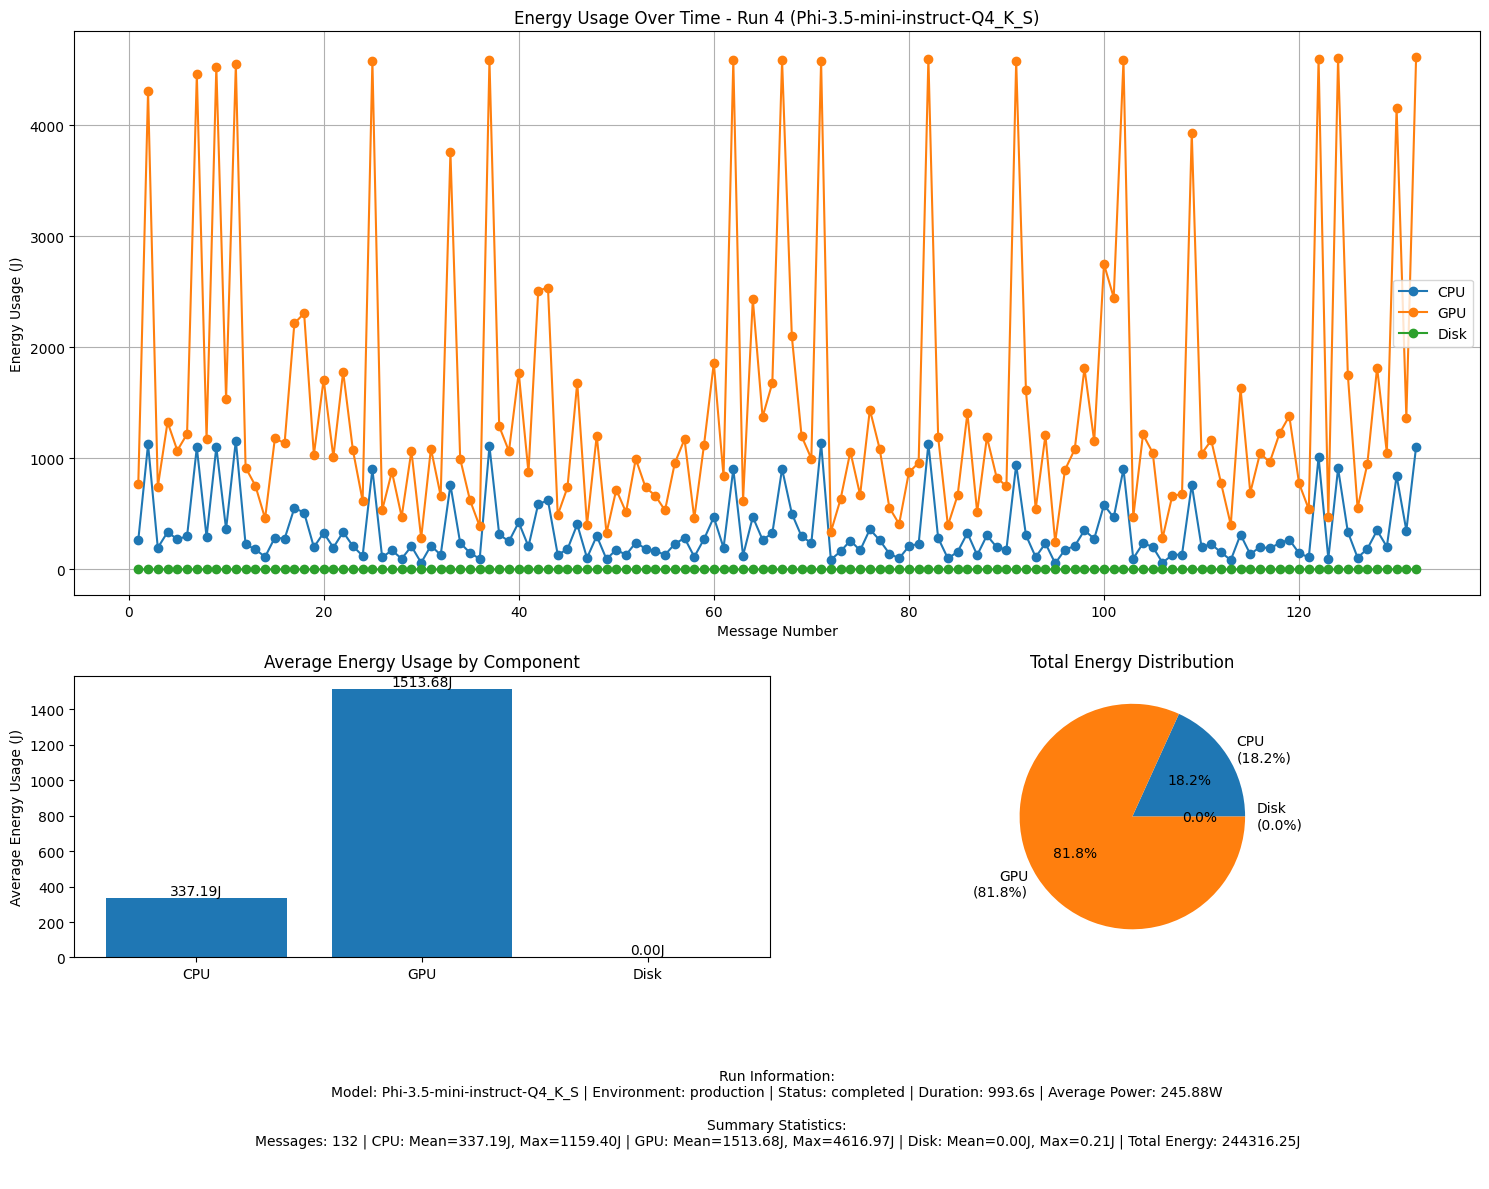

In [6]:
# Get a run
run = Run.last()

# Create visualization
run.plot_power_usage()

In [7]:
run = Run.last()
values = run.get_conversation_df()
values

In [9]:
import json
import re

def parse_json_from_text(text):
    """
    Extracts and parses JSON content from text where JSON is enclosed in triple backticks.
    
    Args:
        text (str): Input text containing JSON within triple backticks
        
    Returns:
        list: List of parsed JSON objects found in the text
        
    Raises:
        json.JSONDecodeError: If JSON parsing fails
        ValueError: If no JSON content is found within backticks
    """
    # Find all content between triple backticks
    pattern = r"```(?:json)?\n(.*?)```"
    matches = re.findall(pattern, text, re.DOTALL)
    
    if not matches:
        raise ValueError("No content found between triple backticks")
    
    # Parse each JSON object found
    parsed_results = []
    for match in matches:
        try:
            # Remove any leading/trailing whitespace
            json_str = match.strip()
            parsed_json = json.loads(json_str)
            parsed_results.append(parsed_json)
        except json.JSONDecodeError as e:
            print(f"Failed to parse JSON: {str(e)}")
            print(f"Problematic content: {json_str}")
            
            
    return parsed_results



In [22]:
for value in values.iterrows():
   print(parse_json_from_text(value[1].Response))

[{'risk_level': 'LOW', 'key_factors': ['The transaction amount of $6.17 is low and within the typical spending patterns for small, routine purchases in health-fitness categories.', "Location: The distance from home to the merchant (Allentown) at 16.14 miles falls well below the cardholder's average transaction radius of 32.5 miles.", 'Time Risk is low as the time coincides with active hours, and no unusual travel patterns are indicated given this single-transaction scenario without preceding transactions to analyze against.'], 'action': 'APPROVE', 'confidence_score': 90}]
Failed to parse JSON: Expecting property name enclosed in double quotes: line 4 column 2 (char 174)
Problematic content: {
	"risk_level": "LOW",
	"key_factors": "- Transaction amount of $12.75 is low relative to typical entertainment spending, aligning with usual patterns for this category.",
	- Merchant 'fraud_Johns Inc' does not deviate significantly from common merchant types associated with the cardholder’s profil

JSONDecodeError: Expecting property name enclosed in double quotes: line 4 column 2 (char 174)